# Simple RNN Code Preparation
`Simple` not an adjective we are using to describe the model - it's the name of the RNN unit.
## Steps
1. Load in the data
    * Same as before, but not the right shapefor our RNN (N x T xD)
We will create a supervised learning dataset, `Input: sequence of length T`, `Output: next value (scalar)`, `the count final target should be at len(series) - 1`, `the RNN expects 3-D input N x T x 1`
2. Build the model
    * We will create a custome model class
    * `nn.RNN` layer takes some extra paramteres from what we have seen before `input_side -> input demintion`, `output -> output demintion`, `num_layers -> number of RNN layers you want`, `nonlinearity -> activation (relu, tanh) only`, `batch_first 'true' -> tells RNN that the shape f input is NxTxD (num_samples, sequence_length, num_features) instade of TxNxD (sequence_length, num_samples, num_features)`
    * Finally we define dense layer `Linear`
3. Train the model
4. Evaluate the model
5. Make Predictions
    * Need to pay attention to shapes

## Code

In [1]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

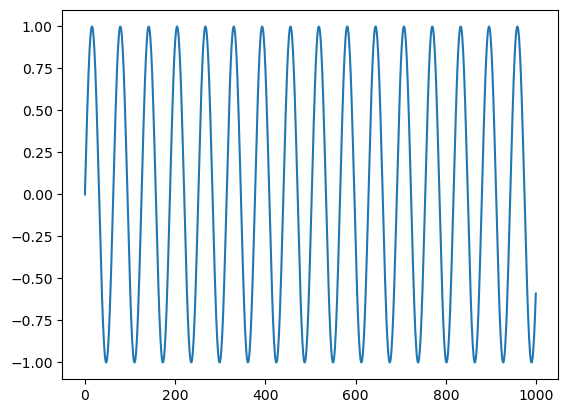

In [2]:
# make the original data
N = 1000
series = np.sin(0.1*np.arange(N))

plt.plot(series)
plt.show()

In [4]:
### Build the dataset
T = 10
X = []
Y = []

for t in range(len(series) - T):
    x = series[t: t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y).reshape(-1, 1)
N = len(X)

print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (990, 10, 1) Y.shape (990, 1)


In [ ]:
class SimpleRNN(nn.Module):
    def __init__(self, n_inputs, n_hidden, n_rnnlayers, n_outputs):
        super(SimpleRNN, self).__init__()
        self.D = n_inputs
        self.M = n_hidden
        self.K = n_outputs
        self.L = n_rnnlayers

        self.rnn = nn.RNN(
            input_size=self.D,
            hidden_size=self.M,
            num_layers=self.L,
            nonlinearity='relu',
            batch_first=True
        )

        self.fc = nn.Linear(self.M, self.K)

    def forward(self, X):
        # Initial hidden states
        h0 = torch.zeros(self.L, X.size(0), self.K)

        out, _ = self.rnn(X, h0)

        out = self.fc(out[:, -1, :])

        return out